# **Projeto análise estatística do Enem 2019**

### Este projeto analisa os resultados do ENEM no estado de São Paulo do ano de 2019.

### Os dados foram extraídos do site INEP:

### http://inep.gov.br/microdados

##**Explicação das colunas**
### 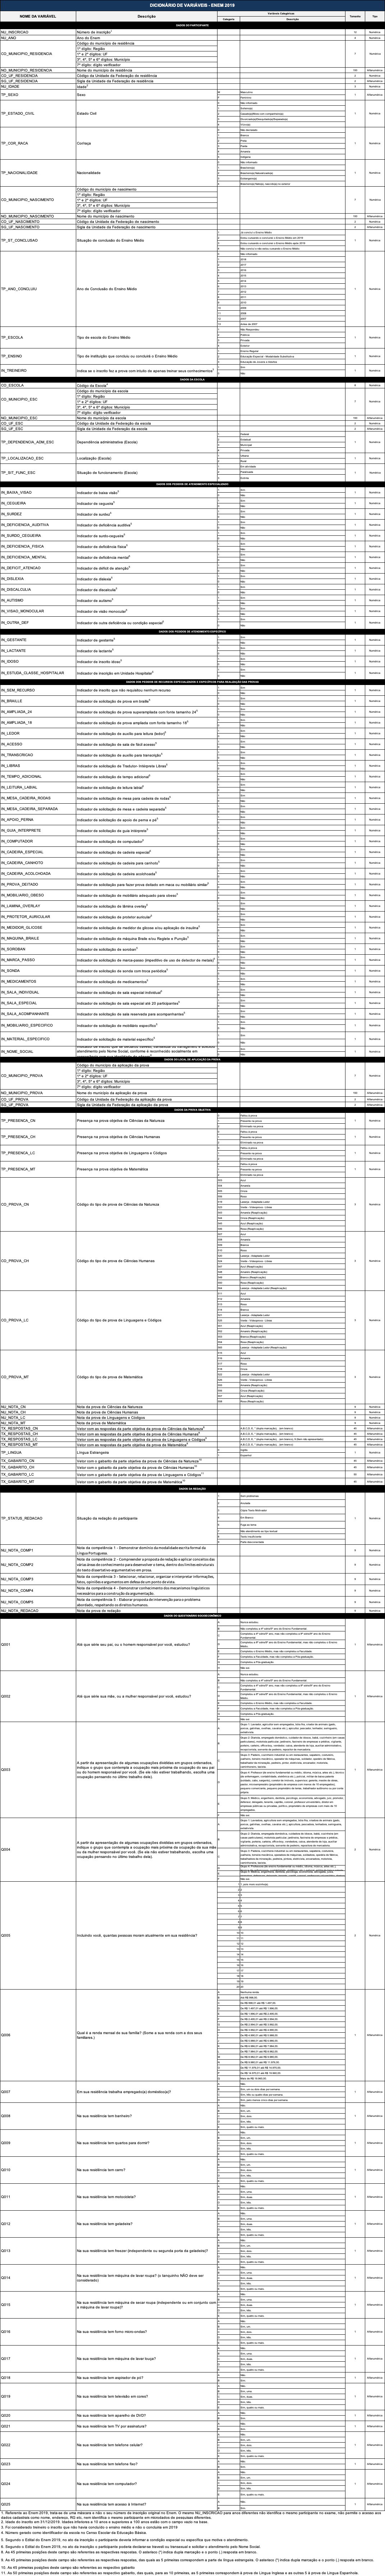

## Importando as Bibliotecas

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('microdados_enem_2019_sp.csv', encoding='latin-1', sep=';')

df.head()


,NU_INSCRICAO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,...,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q025
0,"1,90E+11",3546801,Santa Isabel,35,SP,22,M,1,3,1,...,6002.0,0,1.0,160.0,200.0,180.0,200.0,200.0,940.0,B
1,"1,90E+11",3538204,Pinhalzinho,35,SP,19,M,1,3,1,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
2,"1,90E+11",3550308,São Paulo,35,SP,17,F,1,3,1,...,7318.0,0,1.0,160.0,120.0,200.0,200.0,200.0,880.0,A
3,"1,90E+11",3548708,São Bernardo do Campo,35,SP,19,M,1,3,1,...,3932.0,1,1.0,80.0,160.0,120.0,100.0,100.0,560.0,B
4,"1,90E+11",3549409,São Joaquim da Barra,35,SP,37,M,2,1,1,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B


## Extração e Limpeza dos dados


### Analisando quantidade de linhas e colunas

In [8]:
df.shape

(813772, 44)

## Analisando os tipos de atributos
### Object: string
### int64: inteiro
### float64: reais
### complex: complexos

In [9]:
df.dtypes

NU_INSCRICAO                object
CO_MUNICIPIO_RESIDENCIA      int64
NO_MUNICIPIO_RESIDENCIA     object
CO_UF_RESIDENCIA             int64
SG_UF_RESIDENCIA            object
NU_IDADE                     int64
TP_SEXO                     object
TP_ESTADO_CIVIL              int64
TP_COR_RACA                  int64
TP_NACIONALIDADE             int64
CO_MUNICIPIO_NASCIMENTO    float64
NO_MUNICIPIO_NASCIMENTO     object
CO_UF_NASCIMENTO           float64
SG_UF_NASCIMENTO            object
TP_ST_CONCLUSAO              int64
TP_ANO_CONCLUIU              int64
TP_ESCOLA                    int64
TP_ENSINO                  float64
IN_TREINEIRO                 int64
CO_ESCOLA                  float64
CO_MUNICIPIO_ESC           float64
NO_MUNICIPIO_ESC            object
CO_UF_ESC                  float64
SG_UF_ESC                   object
TP_DEPENDENCIA_ADM_ESC     float64
TP_LOCALIZACAO_ESC         float64
TP_SIT_FUNC_ESC            float64
TP_PRESENCA_CN               int64
TP_PRESENCA_CH      

## Excluindo as colunas
### Exemplo: A coluna de 'CO_MUNICIPIO_RESIDENCIA' e o codigo do municipio, nos ja temos a coluna com os nomes do municipio

In [10]:
df1 = df.drop(columns=['CO_MUNICIPIO_RESIDENCIA','CO_UF_RESIDENCIA','SG_UF_RESIDENCIA','CO_MUNICIPIO_NASCIMENTO','NO_MUNICIPIO_NASCIMENTO','CO_UF_NASCIMENTO','SG_UF_NASCIMENTO','TP_ANO_CONCLUIU','TP_ENSINO'],)

In [11]:
df1 = df1.drop(columns=['TP_DEPENDENCIA_ADM_ESC','TP_LOCALIZACAO_ESC','CO_MUNICIPIO_ESC','CO_UF_ESC','SG_UF_ESC','TP_SIT_FUNC_ESC'],)


In [12]:
df1

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ESCOLA,IN_TREINEIRO,...,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q025
0,"1,90E+11",Santa Isabel,22,M,1,3,1,1,1,0,...,6002.0,0,1.0,160.0,200.0,180.0,200.0,200.0,940.0,B
1,"1,90E+11",Pinhalzinho,19,M,1,3,1,1,1,0,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
2,"1,90E+11",São Paulo,17,F,1,3,1,2,3,0,...,7318.0,0,1.0,160.0,120.0,200.0,200.0,200.0,880.0,A
3,"1,90E+11",São Bernardo do Campo,19,M,1,3,1,2,2,0,...,3932.0,1,1.0,80.0,160.0,120.0,100.0,100.0,560.0,B
4,"1,90E+11",São Joaquim da Barra,37,M,2,1,1,1,1,0,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813767,"1,90E+11",São Paulo,17,F,1,2,1,2,2,0,...,432.0,1,1.0,80.0,120.0,140.0,120.0,100.0,560.0,B
813768,"1,90E+11",São Paulo,17,F,1,3,1,2,2,0,...,4873.0,0,1.0,120.0,80.0,60.0,120.0,0.0,380.0,B
813769,"1,90E+11",São Paulo,17,M,1,3,1,2,2,0,...,4011.0,0,1.0,160.0,120.0,160.0,140.0,160.0,740.0,A
813770,"1,90E+11",Cajamar,21,F,1,3,1,1,1,0,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B


### Corrigindo os erros das notas

In [13]:
df1.loc[:,['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']] /= 10

In [14]:
df1

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ESCOLA,IN_TREINEIRO,...,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q025
0,"1,90E+11",Santa Isabel,22,M,1,3,1,1,1,0,...,600.2,0,1.0,160.0,200.0,180.0,200.0,200.0,940.0,B
1,"1,90E+11",Pinhalzinho,19,M,1,3,1,1,1,0,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
2,"1,90E+11",São Paulo,17,F,1,3,1,2,3,0,...,731.8,0,1.0,160.0,120.0,200.0,200.0,200.0,880.0,A
3,"1,90E+11",São Bernardo do Campo,19,M,1,3,1,2,2,0,...,393.2,1,1.0,80.0,160.0,120.0,100.0,100.0,560.0,B
4,"1,90E+11",São Joaquim da Barra,37,M,2,1,1,1,1,0,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813767,"1,90E+11",São Paulo,17,F,1,2,1,2,2,0,...,43.2,1,1.0,80.0,120.0,140.0,120.0,100.0,560.0,B
813768,"1,90E+11",São Paulo,17,F,1,3,1,2,2,0,...,487.3,0,1.0,120.0,80.0,60.0,120.0,0.0,380.0,B
813769,"1,90E+11",São Paulo,17,M,1,3,1,2,2,0,...,401.1,0,1.0,160.0,120.0,160.0,140.0,160.0,740.0,A
813770,"1,90E+11",Cajamar,21,F,1,3,1,1,1,0,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B


### Renomeando os nomes da coluna

In [15]:
df1 = df1.rename(columns = {'NU_NOTA_CN':'NOTA_CN', 'NU_NOTA_CH': 'NOTA_CH', 'NU_NOTA_LC':'NOTA_LC',
       'NU_NOTA_MT':'NOTA_MT', 'TP_STATUS_REDACAO':'STATUS_REDACAO', 'NU_NOTA_COMP1':'NOTA_COMP1',
       'NU_NOTA_COMP2':'NOTA_COMP2', 'NU_NOTA_COMP3':'NOTA_COMP3', 'NU_NOTA_COMP4':'NOTA_COMP4', 'NU_NOTA_COMP5':'NOTA_COMP5',
       'NU_NOTA_REDACAO':'NOTA_REDACAO','NU_IDADE':'IDADE', 'TP_SEXO':'SEXO','TP_COR_RACA':'RACA','Q025':'INTERNET',
                            'TP_ENSINO':'ENSINO', 'IN_TREINEIRO':'TREINEIRO'})

df1 = df1.rename(columns={'TP_ESCOLA':'ESCOLA'})

### Renomeando os registro das (linhas)

In [16]:
df1['RACA']=df1['RACA'].replace([0,1,2,3,4,5],['Não declarado','Branca','Preta','Parda','Amarela','Indígena'])

In [17]:
df1['TP_LINGUA'] = df1['TP_LINGUA'].replace([0,1],['Inglês','Espanhol'])

In [18]:
df1['ESCOLA'] = df1['ESCOLA'].replace([1,2,3,4],['Não respondeu','Pública','Privada','Exterior'])
df1['INTERNET'] = df1['INTERNET'].replace(['A','B'],['Não','Sim'])

In [19]:
df1['TP_ESTADO_CIVIL']  =df1['TP_ESTADO_CIVIL'].replace([0,1,2,3,4],['Não informado','Solteiro(a)','Casado(a)/Mora com companheiro(a)','Divorciado(a)/Desquitado(a)/Separado(a)','Viúvo(a)'])
df1 = df1.rename(columns={'TP_ESTADO_CIVIL':'ESTADO CIVIL'})

In [20]:
df1['TP_PRESENCA_CH'] = df1['TP_PRESENCA_CH'].replace([0,1,2],['Faltou à prova','Presente na prova','Eliminado na prova'])
df1['TP_PRESENCA_CN']= df1['TP_PRESENCA_CN'].replace([0,1,2],['Faltou à prova','Presente na prova','Eliminado na prova'])
df1['TP_PRESENCA_LC'] = df1['TP_PRESENCA_LC'].replace([0,1,2],['Faltou à prova','Presente na prova','Eliminado na prova'])
df1['TP_PRESENCA_MT'] = df1['TP_PRESENCA_MT'].replace([0,1,2],['Faltou à prova','Presente na prova','Eliminado na prova'])

In [21]:
df1.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,ESTADO CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,TREINEIRO,...,NOTA_MT,TP_LINGUA,STATUS_REDACAO,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO,INTERNET
0,"1,90E+11",Santa Isabel,22,M,Solteiro(a),Parda,1,1,Não respondeu,0,...,600.2,Inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0,Sim
1,"1,90E+11",Pinhalzinho,19,M,Solteiro(a),Parda,1,1,Não respondeu,0,...,NaN,Espanhol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não
2,"1,90E+11",São Paulo,17,F,Solteiro(a),Parda,1,2,Privada,0,...,731.8,Inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0,Não
3,"1,90E+11",São Bernardo do Campo,19,M,Solteiro(a),Parda,1,2,Pública,0,...,393.2,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,Sim
4,"1,90E+11",São Joaquim da Barra,37,M,Casado(a)/Mora com companheiro(a),Branca,1,1,Não respondeu,0,...,NaN,Espanhol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sim


## **Análise Exploratória e Transformação dos dados**

### Análise das idades

In [22]:
df1['IDADE'].value_counts()

IDADE
17    219313
18    147548
19     81236
16     59316
20     53009
       ...  
86         1
4          1
3          1
91         1
2          1
Name: count, Length: 80, dtype: int64

In [23]:
df1['IDADE'].value_counts().sort_index()

IDADE
2     1
3     1
4     1
5     2
6     2
     ..
80    2
81    3
82    2
86    1
91    1
Name: count, Length: 80, dtype: int64

### Analisando a coluna de idade, percebi que temos idades maiores que 80 e menores de 12 anos.

----------

### Tirando alguns valores estranhos e curiosos: Idades menores que 12 anos e maiores de 80 anos

In [24]:
# Filtrar os valores de 'IDADE' entre 12 e 80
df1 = df1[(df1['IDADE'] > 11) & (df1['IDADE'] < 81)]

# Aplicar o arredondamento aos valores restantes de 'IDADE'
df1['IDADE'] = df1['IDADE'].apply(lambda x: round(x))

df1

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,ESTADO CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,TREINEIRO,...,NOTA_MT,TP_LINGUA,STATUS_REDACAO,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO,INTERNET
0,"1,90E+11",Santa Isabel,22,M,Solteiro(a),Parda,1,1,Não respondeu,0,...,600.2,Inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0,Sim
1,"1,90E+11",Pinhalzinho,19,M,Solteiro(a),Parda,1,1,Não respondeu,0,...,NaN,Espanhol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não
2,"1,90E+11",São Paulo,17,F,Solteiro(a),Parda,1,2,Privada,0,...,731.8,Inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0,Não
3,"1,90E+11",São Bernardo do Campo,19,M,Solteiro(a),Parda,1,2,Pública,0,...,393.2,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,Sim
4,"1,90E+11",São Joaquim da Barra,37,M,Casado(a)/Mora com companheiro(a),Branca,1,1,Não respondeu,0,...,NaN,Espanhol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813767,"1,90E+11",São Paulo,17,F,Solteiro(a),Preta,1,2,Pública,0,...,43.2,Espanhol,1.0,80.0,120.0,140.0,120.0,100.0,560.0,Sim
813768,"1,90E+11",São Paulo,17,F,Solteiro(a),Parda,1,2,Pública,0,...,487.3,Inglês,1.0,120.0,80.0,60.0,120.0,0.0,380.0,Sim
813769,"1,90E+11",São Paulo,17,M,Solteiro(a),Parda,1,2,Pública,0,...,401.1,Inglês,1.0,160.0,120.0,160.0,140.0,160.0,740.0,Não
813770,"1,90E+11",Cajamar,21,F,Solteiro(a),Parda,1,1,Não respondeu,0,...,NaN,Espanhol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sim


In [25]:
df1['IDADE'].value_counts().sort_index()

IDADE
12        6
13       29
14      355
15    11583
16    59316
      ...  
76        8
77        3
78        3
79        4
80        2
Name: count, Length: 69, dtype: int64

### Separando os dados para vestibulandos

In [26]:
df2 = df1[(df1['TREINEIRO']==1)]
df2

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,ESTADO CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,TREINEIRO,...,NOTA_MT,TP_LINGUA,STATUS_REDACAO,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO,INTERNET
20,"1,90E+11",Santos,15,F,Solteiro(a),Parda,1,3,Não respondeu,1,...,573.2,Inglês,1.0,140.0,120.0,120.0,100.0,80.0,560.0,Sim
21,"1,90E+11",Panorama,16,F,Solteiro(a),Parda,1,3,Não respondeu,1,...,NaN,Espanhol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não
106,"1,90E+11",São Paulo,16,F,Solteiro(a),Branca,1,3,Não respondeu,1,...,532.6,Inglês,1.0,120.0,120.0,120.0,100.0,80.0,540.0,Sim
109,"1,90E+11",Águas de Lindóia,16,M,Solteiro(a),Branca,1,3,Não respondeu,1,...,NaN,Espanhol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sim
159,"1,90E+11",Águas de Lindóia,15,M,Solteiro(a),Branca,1,3,Não respondeu,1,...,NaN,Inglês,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813551,"1,90E+11",Iepê,16,M,Não informado,Branca,1,3,Não respondeu,1,...,415.7,Inglês,1.0,160.0,120.0,140.0,120.0,140.0,680.0,Sim
813592,"1,90E+11",Barueri,17,F,Solteiro(a),Parda,1,3,Não respondeu,1,...,NaN,Espanhol,1.0,120.0,120.0,120.0,120.0,100.0,580.0,Sim
813604,"1,90E+11",São Paulo,16,F,Solteiro(a),Branca,1,3,Não respondeu,1,...,525.4,Inglês,1.0,140.0,180.0,160.0,160.0,180.0,820.0,Sim
813740,"1,90E+11",Santo André,16,M,Solteiro(a),Branca,1,3,Não respondeu,1,...,720.6,Inglês,1.0,140.0,140.0,160.0,160.0,160.0,760.0,Sim


### Análise das presenças

In [27]:
df1['TP_PRESENCA_CN'].value_counts()

TP_PRESENCA_CN
Presente na prova     582587
Faltou à prova        230854
Eliminado na prova       308
Name: count, dtype: int64

In [28]:
df1['TP_PRESENCA_CH'].value_counts()

TP_PRESENCA_CH
Presente na prova     620627
Faltou à prova        192391
Eliminado na prova       731
Name: count, dtype: int64

In [29]:
df1['TP_PRESENCA_LC'].value_counts()

TP_PRESENCA_LC
Presente na prova     620627
Faltou à prova        192391
Eliminado na prova       731
Name: count, dtype: int64

In [30]:
df1['TP_PRESENCA_MT'].value_counts()

TP_PRESENCA_MT
Presente na prova     582587
Faltou à prova        230854
Eliminado na prova       308
Name: count, dtype: int64

# **Resumo da presença nas provas:**
### **Ciências da Natureza:** Presente na prova: 582587, Faltou à prova: 230854,Eliminado na prova: 308

### **Ciências Humanas:** Presente na prova: 620627, Faltou à prova: 192391, Eliminado na prova: 731

### **Linguagem e Códigos:** Presente na prova: 620627, Faltou à prova: 192391, Eliminado na prova: 731

### **Matemática:** Presente na prova: 582587, Faltou à prova: 230854, Eliminado na prova: 308

--------------

### Analisando a coluna 'STATUS_REDACAO'

### **Explicação da coluna**
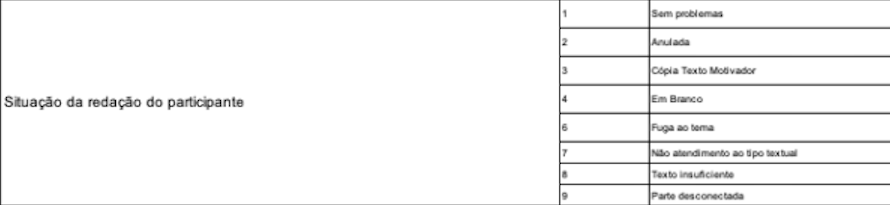

In [31]:
df1['STATUS_REDACAO'].value_counts().sort_index()

STATUS_REDACAO
1.0    605586
2.0       968
3.0      1617
4.0      6490
6.0      3882
7.0       556
8.0       949
9.0       579
Name: count, dtype: int64

### **Resumo do status da redação:**

###1.0:   605586
###2.0:      968
###3.0:     1617
###4.0:     6490
###6.0:     3882
###7.0:      556
###8.0:      949
###9.0:      579
### 1.0: redações sem problemas
### Do 2.0 à 9.0 problemas com as redações

-----------

### Valores nulos

In [32]:
df1['IDADE'].isnull().sum()

0

In [33]:
provas = ['NOTA_CN', 'NOTA_CH', 'NOTA_LC',
       'NOTA_MT','NOTA_REDACAO']

In [34]:
df1[provas].isnull().sum()

NOTA_CN         231162
NOTA_CH         193122
NOTA_LC         193122
NOTA_MT         231162
NOTA_REDACAO    193122
dtype: int64

In [35]:
# Filtrando alunos que estavam presentes na prova
df1_classif = df1.loc[(df1['TP_PRESENCA_CH'] == 'Presente na prova')]
df1_classif = df1_classif.loc[(df1_classif['TP_PRESENCA_MT'] == 'Presente na prova')]

In [36]:
df1_classif['TP_PRESENCA_CN'].value_counts()

TP_PRESENCA_CN
Presente na prova    581166
Name: count, dtype: int64

In [37]:
df1_classif['TP_PRESENCA_MT'].value_counts()

TP_PRESENCA_MT
Presente na prova    581166
Name: count, dtype: int64

In [38]:
df1_classif['TP_PRESENCA_CH'].value_counts()

TP_PRESENCA_CH
Presente na prova    581166
Name: count, dtype: int64

In [39]:
df1_classif['TP_PRESENCA_LC'].value_counts()

TP_PRESENCA_LC
Presente na prova    581166
Name: count, dtype: int64

In [40]:
df1_classif.isnull().sum()

NU_INSCRICAO                    0
NO_MUNICIPIO_RESIDENCIA         0
IDADE                           0
SEXO                            0
ESTADO CIVIL                    0
RACA                            0
TP_NACIONALIDADE                0
TP_ST_CONCLUSAO                 0
ESCOLA                          0
TREINEIRO                       0
CO_ESCOLA                  404272
NO_MUNICIPIO_ESC           404272
TP_PRESENCA_CN                  0
TP_PRESENCA_CH                  0
TP_PRESENCA_LC                  0
TP_PRESENCA_MT                  0
NOTA_CN                         0
NOTA_CH                         0
NOTA_LC                         0
NOTA_MT                         0
TP_LINGUA                       0
STATUS_REDACAO                  0
NOTA_COMP1                      0
NOTA_COMP2                      0
NOTA_COMP3                      0
NOTA_COMP4                      0
NOTA_COMP5                      0
NOTA_REDACAO                    0
INTERNET                        0
dtype: int64

In [41]:
df1_classif = df1_classif.drop(columns = ['CO_ESCOLA','NO_MUNICIPIO_ESC'])

In [42]:
df1_classif.isnull().sum()

NU_INSCRICAO               0
NO_MUNICIPIO_RESIDENCIA    0
IDADE                      0
SEXO                       0
ESTADO CIVIL               0
RACA                       0
TP_NACIONALIDADE           0
TP_ST_CONCLUSAO            0
ESCOLA                     0
TREINEIRO                  0
TP_PRESENCA_CN             0
TP_PRESENCA_CH             0
TP_PRESENCA_LC             0
TP_PRESENCA_MT             0
NOTA_CN                    0
NOTA_CH                    0
NOTA_LC                    0
NOTA_MT                    0
TP_LINGUA                  0
STATUS_REDACAO             0
NOTA_COMP1                 0
NOTA_COMP2                 0
NOTA_COMP3                 0
NOTA_COMP4                 0
NOTA_COMP5                 0
NOTA_REDACAO               0
INTERNET                   0
dtype: int64

In [43]:
df1_classif[provas].isnull().sum()

NOTA_CN         0
NOTA_CH         0
NOTA_LC         0
NOTA_MT         0
NOTA_REDACAO    0
dtype: int64